In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Step 1: Load and Prepare the Data
amazon_data = pd.read_excel("S&P data.xlsx", sheet_name = 'amazon 5year daily',engine='openpyxl' )
sp500_data = pd.read_excel("S&P data.xlsx", sheet_name = '5 year daily', engine='openpyxl')

In [373]:
sp500_data.head()

,Date,Last Price,Volume,SMAVG (15)
0,2024-05-02,5064.20,NaN,NaN
1,2024-05-01,5018.39,808495488.0,706686784.0
2,2024-04-30,5035.69,910318912.0,695816768.0
3,2024-04-29,5116.17,663462720.0,672963392.0
4,2024-04-26,5099.96,686360896.0,666001024.0


In [374]:
## sort in ascending order of date
sp500_data.sort_values(by = 'Date', ascending = True, inplace = True)
amazon_data.sort_values(by = 'Date', ascending = True, inplace = True)

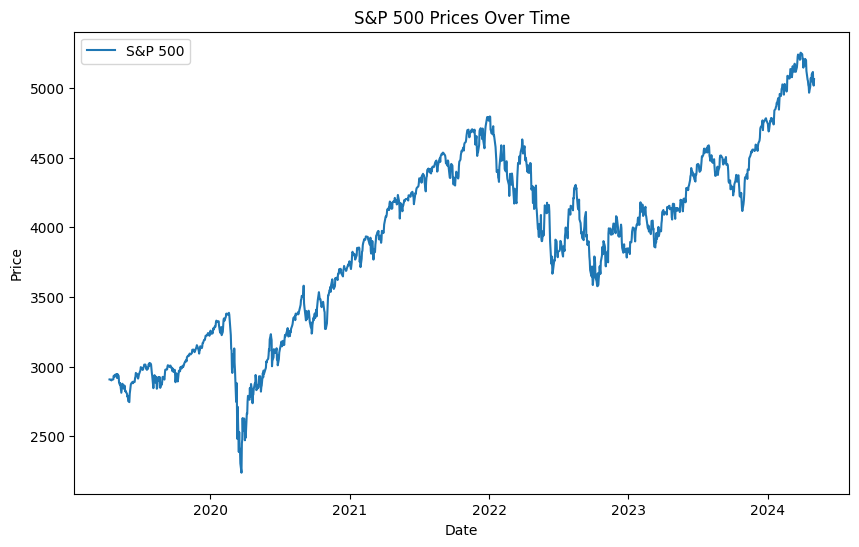

In [375]:

# Step 2: Exploratory Data Analysis (EDA)
# Plot the time series data

plt.figure(figsize=(10, 6))
plt.plot(sp500_data['Date'], sp500_data['Last Price'], label='S&P 500')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P 500 Prices Over Time')
plt.legend()
plt.show()

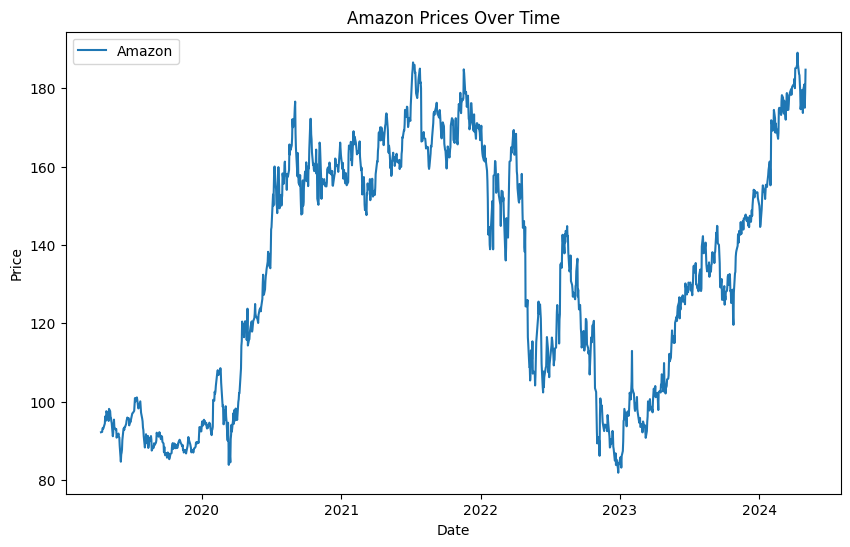

In [376]:
# Step 2: Exploratory Data Analysis (EDA)
# Plot the time series data

plt.figure(figsize=(10, 6))
plt.plot(amazon_data['Date'], amazon_data['Last Price'], label='Amazon')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Amazon Prices Over Time')
plt.legend()
plt.show()

In [377]:
# Step 3: Correlation Analysis
correlation = sp500_data['Last Price'].corr(amazon_data['Last Price'])
print("Correlation between S&P500 and Amazon prices:", correlation)

Correlation between S&P500 and Amazon prices: 0.6447356351251583


## % Returns

In [378]:
# Step 1: Calculate the returns
sp500_data['Return'] = sp500_data['Last Price'].pct_change()
amazon_data['Return'] = amazon_data['Last Price'].pct_change()

# Step 2: Resample the returns data
# Yearly returns
sp500_yearly_returns = sp500_data.set_index('Date')['Return'].resample('Y').sum()
amazon_yearly_returns = amazon_data.set_index('Date')['Return'].resample('Y').sum()


# Step 3: Calculate correlation
# Yearly correlation
yearly_correlation = sp500_yearly_returns.corr(amazon_yearly_returns)


# Print correlation results
print("Yearly Correlation:")
print(yearly_correlation)



Yearly Correlation:
0.8187217010537347


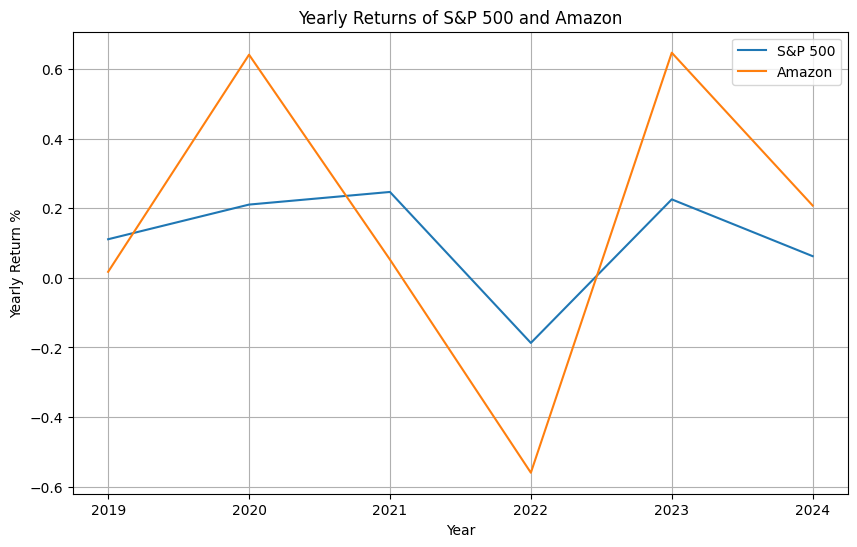

In [379]:
import matplotlib.pyplot as plt

# Plot yearly returns
plt.figure(figsize=(10, 6))
plt.plot(sp500_yearly_returns.index.year, sp500_yearly_returns.values, label='S&P 500')
plt.plot(amazon_yearly_returns.index.year, amazon_yearly_returns.values, label='Amazon')
plt.xlabel('Year')
plt.ylabel('Yearly Return %')
plt.title('Yearly Returns of S&P 500 and Amazon')
plt.legend()
plt.grid(True)
plt.show()



## Time Series

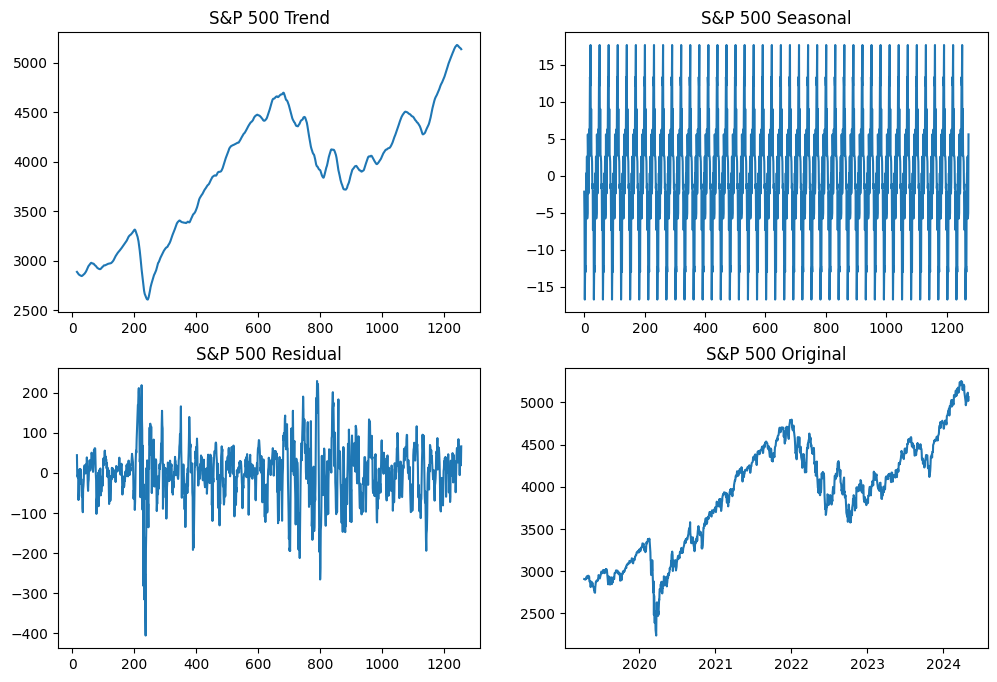

In [380]:
# Step 4: Time Series Decomposition
sp500_decomposition = seasonal_decompose(sp500_data['Last Price'].values, model='additive', period = 30)
sp500_trend = sp500_decomposition.trend
sp500_seasonal = sp500_decomposition.seasonal
sp500_residual = sp500_decomposition.resid

amazon_decomposition = seasonal_decompose(amazon_data['Last Price'].values,  model='additive', period = 30)
amazon_trend = amazon_decomposition.trend
amazon_seasonal = amazon_decomposition.seasonal
amazon_residual = amazon_decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(sp500_trend)
plt.title('S&P 500 Trend')
plt.subplot(2, 2, 2)

plt.plot(sp500_seasonal)
plt.title('S&P 500 Seasonal')
plt.subplot(2, 2, 3)
plt.plot(sp500_residual)
plt.title('S&P 500 Residual')
plt.subplot(2, 2, 4)
plt.plot(sp500_data['Date'], sp500_data['Last Price'])
plt.title('S&P 500 Original')
plt.show()



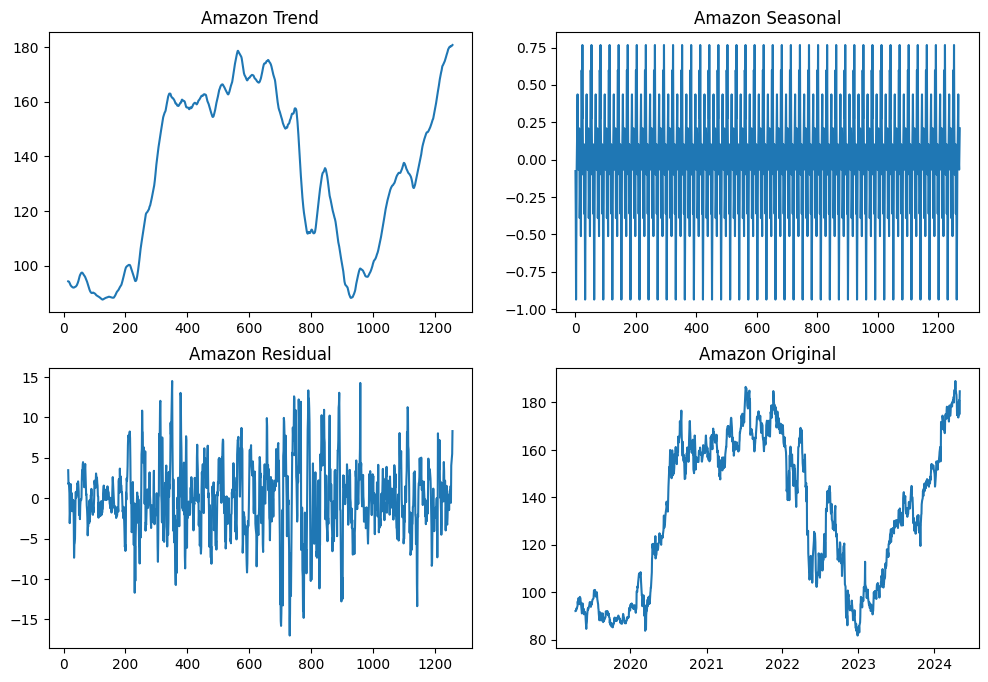

In [381]:
# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(amazon_trend)
plt.title('Amazon Trend')
plt.subplot(2, 2, 2)

plt.plot(amazon_seasonal)
plt.title('Amazon Seasonal')
plt.subplot(2, 2, 3)
plt.plot(amazon_residual)
plt.title('Amazon Residual')
plt.subplot(2, 2, 4)
plt.plot(amazon_data['Date'], amazon_data['Last Price'])
plt.title('Amazon Original')
plt.show()


In [382]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test on your time series data
result = adfuller(sp500_data['Last Price'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print test results
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')


ADF Statistic: -1.0381680056207732
p-value: 0.7390901876624046
Critical Values:
	1%: -3.4355381554821585
	5%: -2.8638311143598556
	10%: -2.567989813198476


In [383]:
result = adfuller(amazon_data['Last Price'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print test results
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -1.5003332231076356
p-value: 0.5333464917670199
Critical Values:
	1%: -3.4355013723543166
	5%: -2.863814884719495
	10%: -2.5679811700733755


In [384]:
## both non-stationary data

In [385]:
# Take the first difference
sp500_data['Last Price_diff'] = sp500_data['Last Price'].diff()

# Drop NaN values created by differencing
sp500_data.dropna(inplace=True)

# Perform Dickey-Fuller test on differenced data to check stationarity
result_diff = adfuller(sp500_data['Last Price_diff'])

# Print test results
print("After differencing:")
print(f'ADF Statistic: {result_diff[0]}')
print(f'p-value: {result_diff[1]}')
print('Critical Values:')
for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')


After differencing:
ADF Statistic: -10.882753709495223
p-value: 1.2824107942473211e-19
Critical Values:
	1%: -3.4355964295197743
	5%: -2.863856825923603
	10%: -2.5680035060041626


In [386]:
# Take the first difference
amazon_data['Last Price_diff'] = amazon_data['Last Price'].diff()

# Drop NaN values created by differencing
amazon_data.dropna(inplace=True)

# Perform Dickey-Fuller test on differenced data to check stationarity
result_diff = adfuller(amazon_data['Last Price_diff'])

# Print test results
print("After differencing:")
print(f'ADF Statistic: {result_diff[0]}')
print(f'p-value: {result_diff[1]}')
print('Critical Values:')
for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')


After differencing:
ADF Statistic: -36.250987443898666
p-value: 0.0
Critical Values:
	1%: -3.4355588184378574
	5%: -2.8638402312881497
	10%: -2.5679946684494275


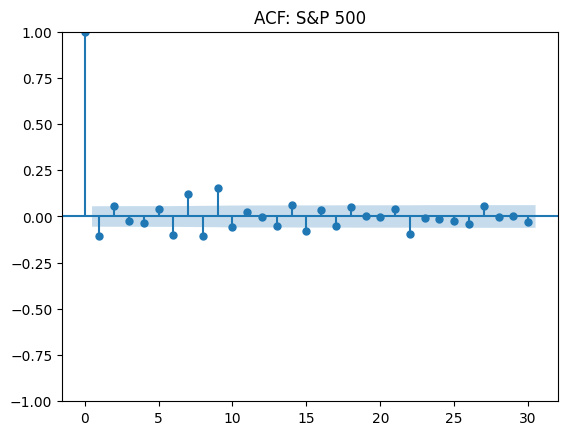

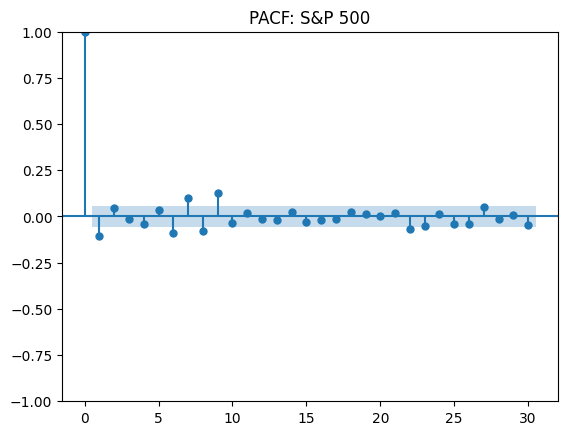

In [387]:
# Repeat the same for Amazon data

# Step 5: ACF and PACF
plot_acf(sp500_data['Last Price_diff'], lags=30)
plt.title('ACF: S&P 500')
plt.show()

plot_pacf(sp500_data['Last Price_diff'], lags=30)
plt.title('PACF: S&P 500')
plt.show()

## Seems like AR1 model


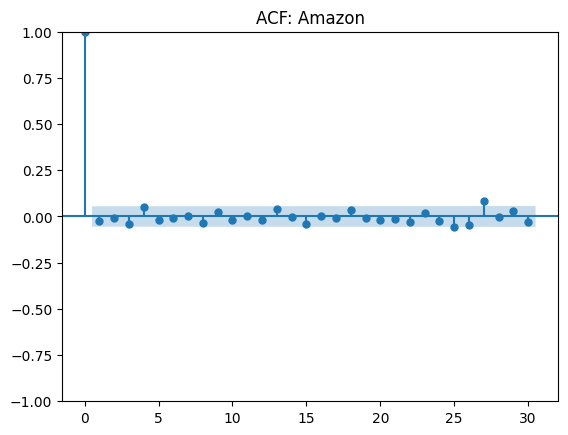

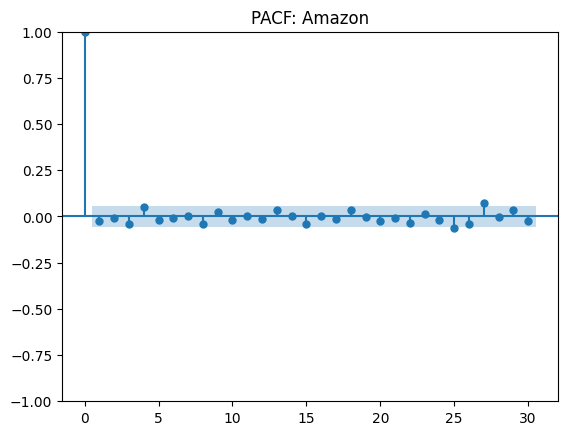

In [388]:
# Repeat the same for Amazon data

# Step 5: ACF and PACF
plot_acf(amazon_data['Last Price_diff'], lags=30)
plt.title('ACF: Amazon')
plt.show()

plot_pacf(amazon_data['Last Price_diff'], lags=30)
plt.title('PACF: Amazon')
plt.show()

## Seems like AR 2, MA 1 model


c:\Users\Shankii\anaconda3\envs\pysparkenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shankii\anaconda3\envs\pysparkenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shankii\anaconda3\envs\pysparkenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Last Price   No. Observations:                 1259
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3124.345
Date:                Sat, 11 May 2024   AIC                           6254.690
Time:                        21:25:20   BIC                           6270.102
Sample:                             0   HQIC                          6260.482
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8901      0.185      4.816      0.000       0.528       1.252
ma.L1         -0.9025      0.173     -5.207      0.000      -1.242      -0.563
sigma2         8.4086      0.183     45.913      0.0

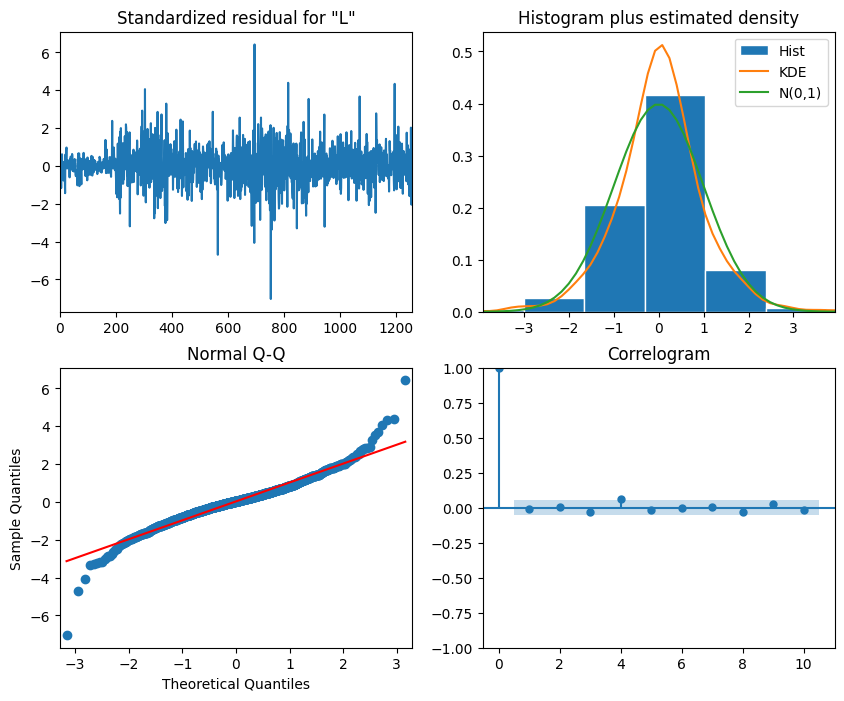

Forecasted values: 1259    184.651587
1260    184.590696
1261    184.536499
1262    184.488261
1263    184.445327
1264    184.407114
1265    184.373101
1266    184.342829
1267    184.315885
1268    184.291903
1269    184.270558
1270    184.251559
1271    184.234650
1272    184.219600
1273    184.206204
Name: predicted_mean, dtype: float64


c:\Users\Shankii\anaconda3\envs\pysparkenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Shankii\anaconda3\envs\pysparkenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [389]:
from statsmodels.tsa.arima.model import ARIMA


p = 1  # Your chosen value for p
d = 1  # Since the data has been differenced once
q = 1 # Your chosen value for q

# Fit ARIMA model
model = ARIMA(amazon_data['Last Price'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot the residuals
model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

# Make predictions
forecast = model_fit.forecast(steps=15)  # Forecasting 12 steps ahead
print("Forecasted values:", forecast)


C:\Users\Shankii\AppData\Local\Temp\ipykernel_32260\468026819.py:4: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=start_date, periods=15 + 1, closed='right')


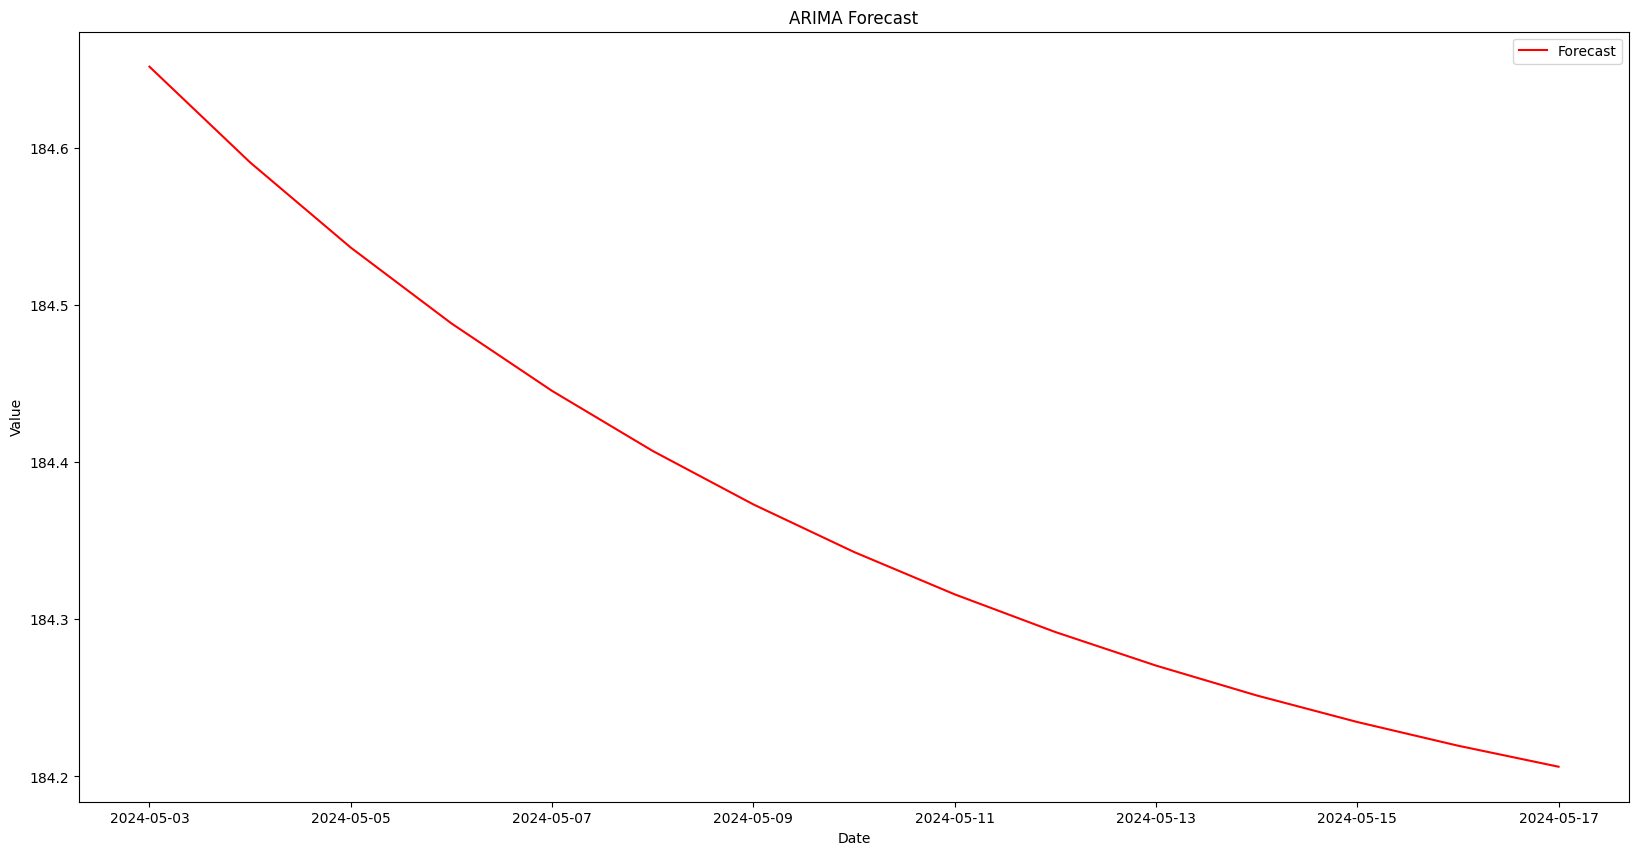

In [390]:
start_date = amazon_data['Date'].iloc[-1]

# Generate the forecast index
forecast_index = pd.date_range(start=start_date, periods=15 + 1, closed='right')


plt.figure(figsize=(20, 10))
# # Plot the observed data
# amazon_data_2024 = amazon_data[(amazon_data['Date'].dt.year == 2024)]
# plt.plot(amazon_data_2024['Date'][::-1], amazon_data_2024['Last Price'][::-1], label='Observed')

# Plot the forecasted values
plt.plot(forecast_index, forecast, label='Forecast', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Forecast')

# Add legend
plt.legend()

# Show plot
plt.show()

c:\Users\Shankii\anaconda3\envs\pysparkenv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004913. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 192275860.67711815
Iteration:      2,   Func. Count:     18,   Neg. LLF: 26453768.702940807
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3105.4926123365167
            Iterations: 2
            Function evaluations: 25
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             Last Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3105.49
Distribution:                  Normal   AIC:                          -6202.99
Method:            Maximum Likelihood   BIC:                          -6182.44
                                        No. Observations:                 1258
Date:                Sat, May 11 2024   Df Residuals:                     1257
Time:        

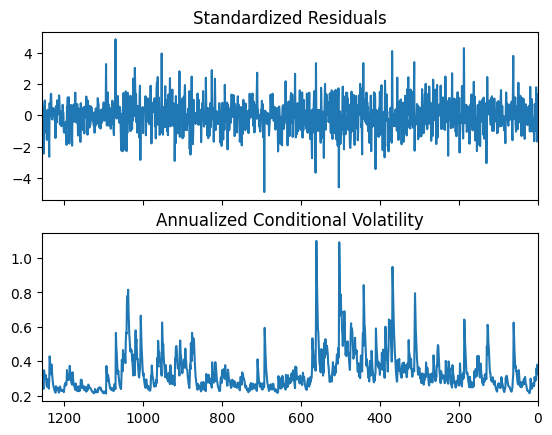

In [391]:

from arch import arch_model

# Assuming you have the Amazon equity prices loaded into a pandas DataFrame named amazon_data

# Calculate returns
amazon_returns = amazon_data['Last Price'].pct_change().dropna()

# Specify GARCH model parameters
p = 1  # Lag order for ARCH
q = 1  # Lag order for GARCH
mean_model = 'Constant'  # Mean model
vol_model = 'GARCH'  # Volatility model

# Fit the GARCH model
model = arch_model(amazon_returns, mean=mean_model, vol=vol_model, p=p, q=q)
result = model.fit()

# Display model summary
print(result.summary())

# Plot volatility
result.plot(annualize='D')

# Show plot
plt.show()


In [392]:
# Forecast future volatility
forecast_horizon = 15  # Number of periods to forecast
forecasts_garch = result.forecast(start=None, horizon=forecast_horizon)

# Extract forecasted conditional volatility
forecasted_volatility = forecasts_garch.variance.dropna().values[-1]

# Calculate forecasted prices using the volatility
last_price = amazon_data['Last Price'].iloc[-1]
forecasted_prices = last_price * np.exp(np.sqrt(forecasted_volatility))

# Print forecasted prices
print("Forecasted Prices for the Next {} Days:".format(forecast_horizon))
for i, price in enumerate(forecasted_prices):
    print("Day {}: {:.2f}".format(i+1, price))


Forecasted Prices for the Next 15 Days:
Day 1: 189.38
Day 2: 189.33
Day 3: 189.28
Day 4: 189.24
Day 5: 189.21
Day 6: 189.17
Day 7: 189.14
Day 8: 189.12
Day 9: 189.09
Day 10: 189.07
Day 11: 189.05
Day 12: 189.03
Day 13: 189.01
Day 14: 189.00
Day 15: 188.98


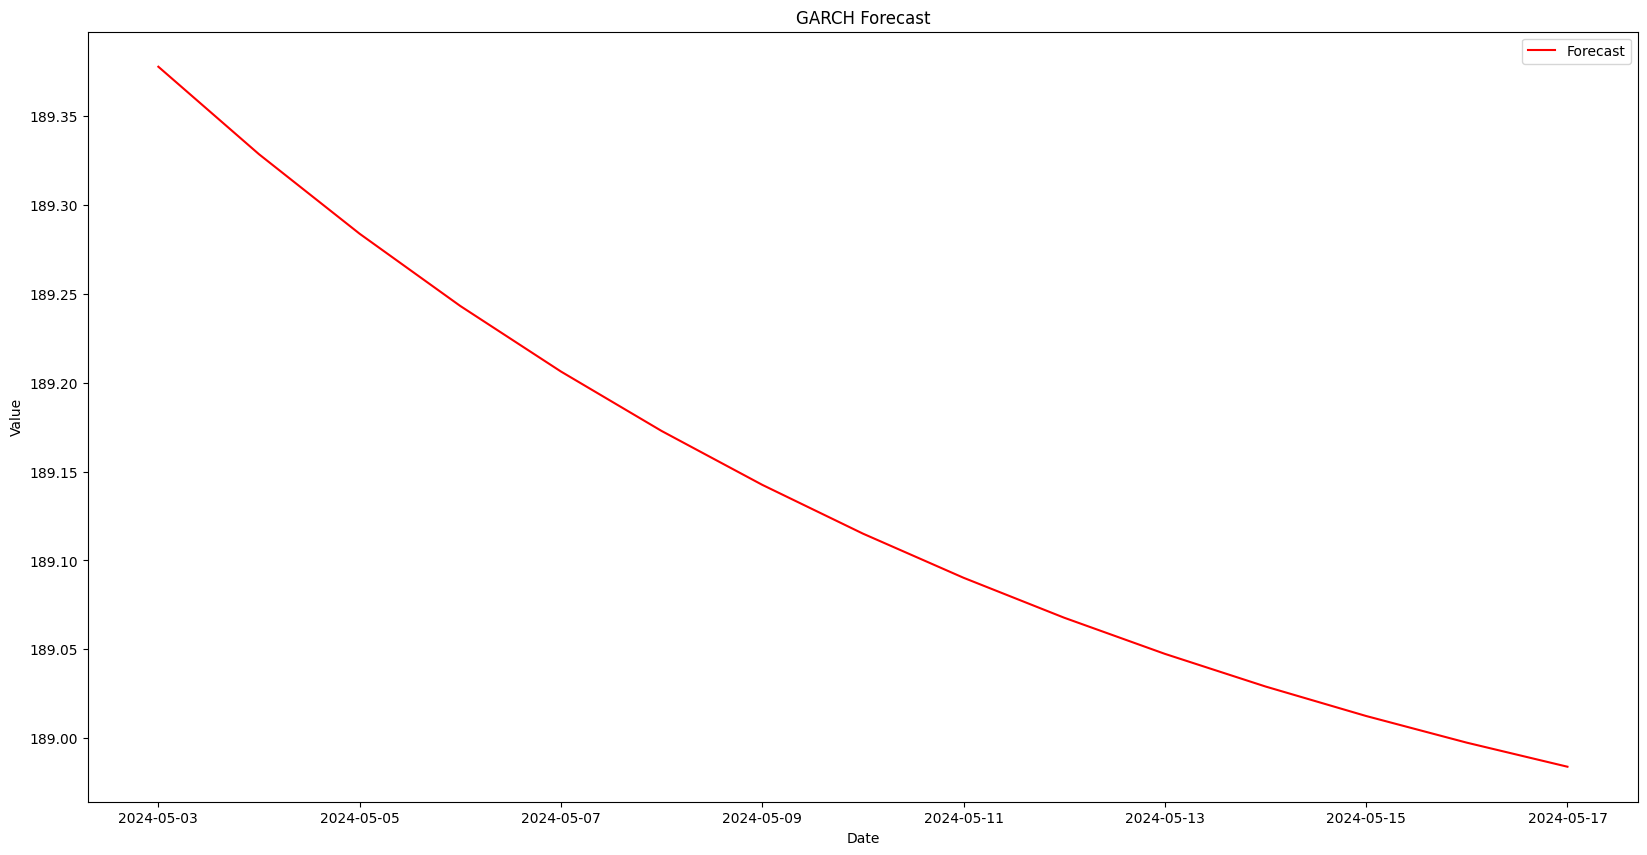

In [393]:
# start_date = amazon_data['Date'].iloc[-1]

# Generate the forecast index
# forecast_index = pd.date_range(start=start_date, periods=15 + 1, closed='right')


plt.figure(figsize=(20, 10))
# # Plot the observed data

# amazon_data_2024 = amazon_data[(amazon_data['Date'].dt.year == 2024)]
# plt.plot(amazon_data_2024['Date'][::-1], amazon_data_2024['Last Price'][::-1], label='Observed')

# Plot the forecasted values
plt.plot(forecast_index, forecasted_prices, label='Forecast', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('GARCH Forecast')

# Add legend
plt.legend()

# Show plot
plt.show()

In [394]:
final_price = [(forecasted_prices[i] + forecast.values[i]) / 2 for i in range(len(forecasted_prices))]
final_price

[187.01472103931448,
 186.9596511153104,
 186.91017223380308,
 186.86572835019584,
 186.82581701017398,
 186.7899843868181,
 186.7578207663309,
 186.72895643841892,
 186.70305795316284,
 186.67982471097326,
 186.65898585614195,
 186.64029744771847,
 186.62353988411007,
 186.60851556003593,
 186.59504673636155]

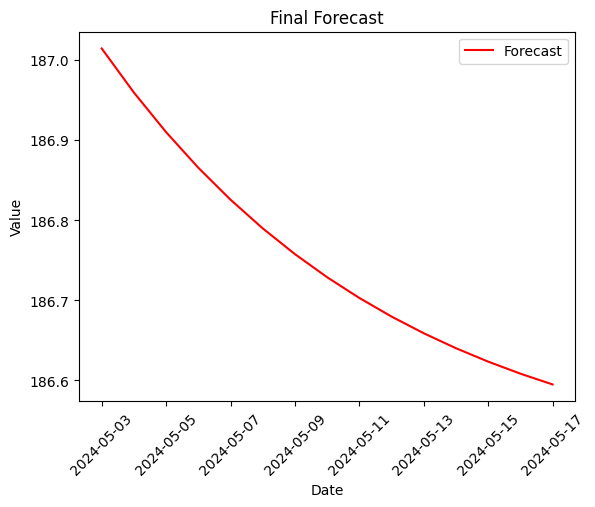

In [395]:
plt.plot(forecast_index, final_price, label='Forecast', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Final Forecast')
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.show()